# **Grupo 1 - Machine Learning**
### **Integrantes**
### **u202218044 - Mayhua Hinostroza, José Antonio**
### **u202216120 - Manchay Paredes, Lucero Salome**
### **u20191e650 - Arquiñigo Jacinto, Ibrahim Imanol Jordi**

In [86]:
%pip install pandas matplotlib seaborn numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [87]:
#Incluya las principales librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


## **Analisis Exploratorio de Datos**

In [88]:
# Cargar datos
df = pd.read_csv('credit_card_transactions.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [90]:
df.describe()

,TransactionID,Amount,MCC,TransactionSpeed,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,547.347491,5950.102900,30.738446,0.019200
std,2886.89568,460.047329,664.526287,19.092345,0.137234
min,1.00000,10.090000,5261.000000,0.110000,0.000000
25%,2500.75000,263.222500,5411.000000,14.910000,0.000000
50%,5000.50000,512.240000,5812.000000,29.655000,0.000000
75%,7500.25000,759.935000,5968.000000,45.270000,0.000000
max,10000.00000,4988.070000,7299.000000,119.860000,1.000000


In [91]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [92]:
df.shape

(10000, 11)

In [93]:
df.isnull().sum()

TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64

In [94]:
df.duplicated().any()

np.False_

In [95]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns
columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns

In [96]:
print("Columnas Categoricas: ",columnas_categoricas)
print("Columnas Numericas: ",columnas_numericas)

Columnas Categoricas:  Index(['Time', 'CardholderName', 'MerchantName', 'Location', 'Device',
       'IPAddress'],
      dtype='object')
Columnas Numericas:  Index(['TransactionID', 'Amount', 'MCC', 'TransactionSpeed', 'Fraud'], dtype='object')


In [97]:
# Para variables categóricas
for col in ["CardholderName","MerchantName","Location","Device"]:
    print(col, ":", df[col].nunique(), "categorías")
    print(df[col].value_counts().head(), "\n")


CardholderName : 9439 categorías
CardholderName
Melissa Davis     5
Robert Smith      5
Kimberly Smith    4
Tyler Smith       4
Michael Brown     4
Name: count, dtype: int64 

MerchantName : 8677 categorías
MerchantName
Smith and Sons    17
Johnson Inc       14
Smith Group       14
Smith PLC         13
Jones Ltd         12
Name: count, dtype: int64 

Location : 7697 categorías
Location
West Michael     14
North Michael    10
East Michael      9
Lake Michael      9
East Daniel       8
Name: count, dtype: int64 

Device : 4 categorías
Device
Android    2556
Web        2537
POS        2471
iOS        2436
Name: count, dtype: int64 



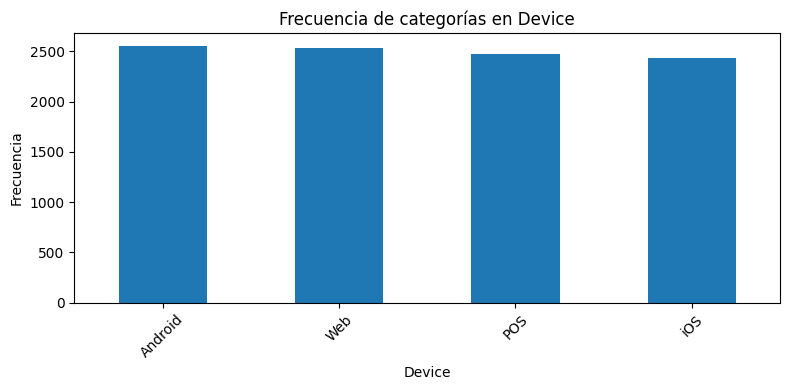

In [98]:
for col in ["Device"]:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de categorías en {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

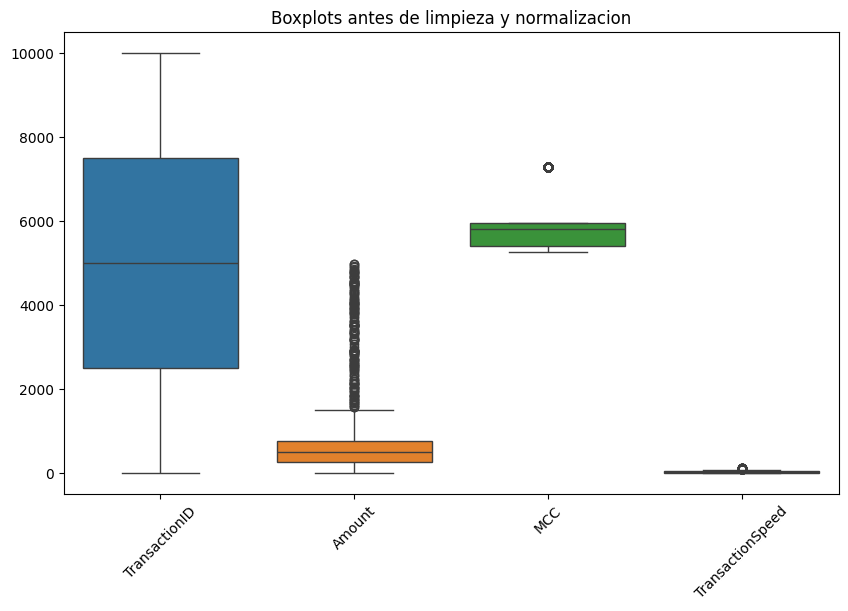

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[columnas_numericas].drop(columns=["Fraud"], axis=1))
plt.title("Boxplots antes de limpieza y normalizacion")
plt.xticks(rotation=45)
plt.show()

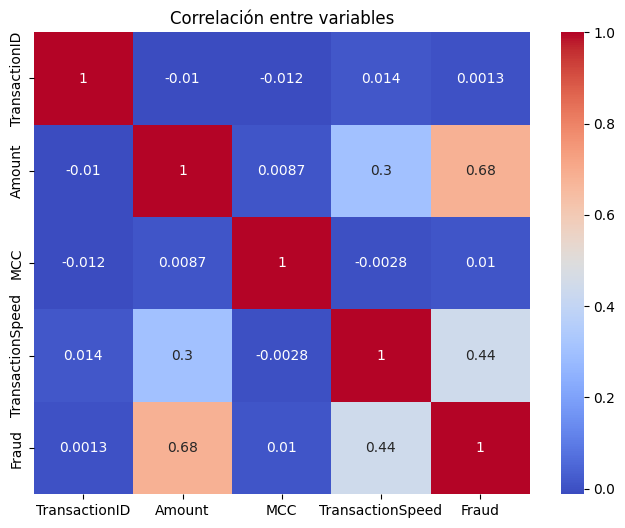

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

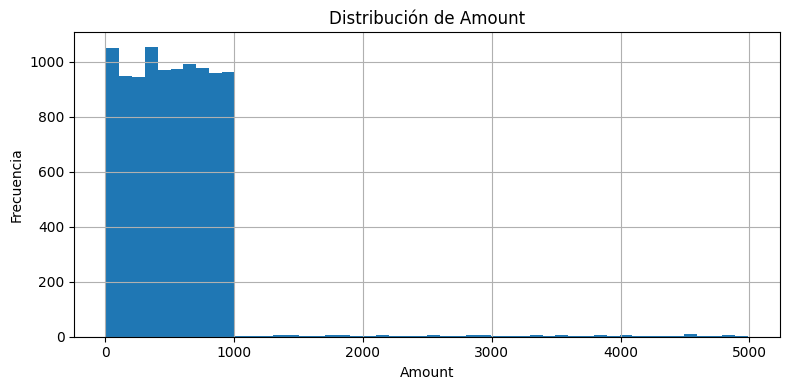

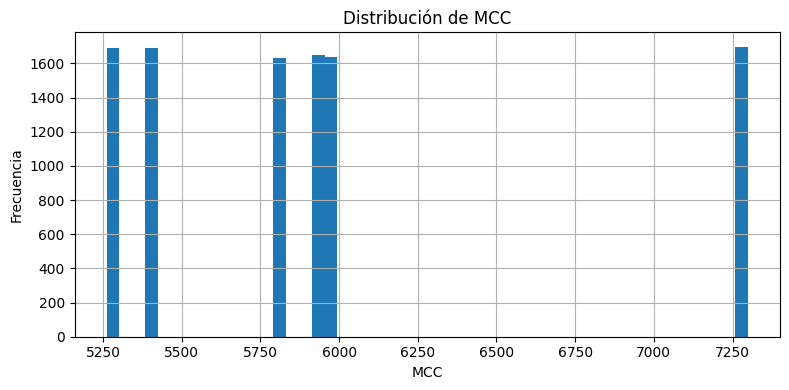

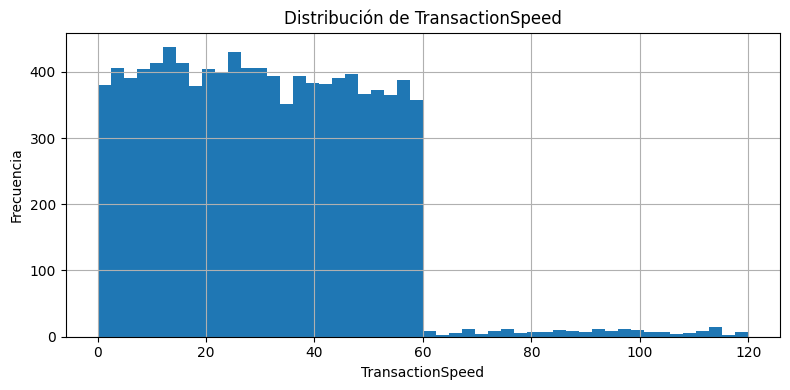

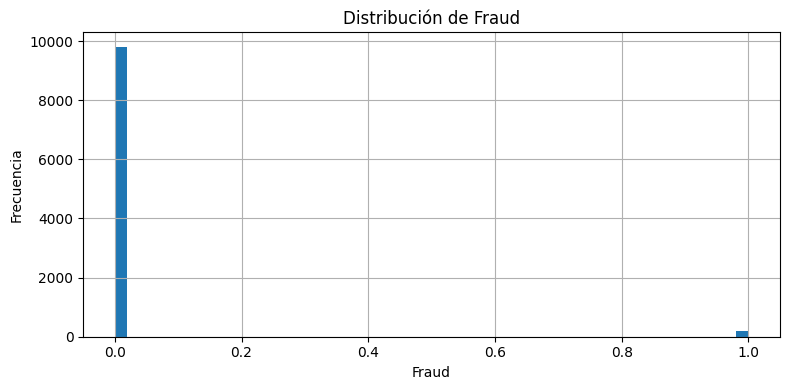

In [101]:
for col in columnas_numericas.drop(["TransactionID"]):
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=50)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Se puede determinar desbalances de clases en la columna Fraud, como se ve en el ultimo grafico de distribucion

## **PreProcesamiento**

In [102]:
df = df.drop(columns=["TransactionID"])

In [103]:
df["Time"] = pd.to_datetime(df["Time"])
df["hour"] = df["Time"].dt.hour
df["dow"]  = df["Time"].dt.dayofweek
df["year"]  = df["Time"].dt.year
df["month"]  = df["Time"].dt.month

In [104]:
df.head()

,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud,hour,dow,year,month
0,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0,6,6,2025,3
1,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0,5,4,2025,2
2,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0,15,4,2024,5
3,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0,9,4,2024,5
4,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0,17,3,2025,4


In [105]:
df = df.drop(columns=["Time"])

In [106]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns
columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns
print(columnas_categoricas)
print(columnas_numericas)

Index(['CardholderName', 'MerchantName', 'Location', 'Device', 'IPAddress'], dtype='object')
Index(['Amount', 'MCC', 'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year',
       'month'],
      dtype='object')


In [107]:
df["IP_octet_1"] = df["IPAddress"].str.split(".", expand=True)[0].astype(int)

df = df.drop(columns=["IPAddress"])

In [108]:
df.columns

Index(['Amount', 'CardholderName', 'MerchantName', 'MCC', 'Location', 'Device',
       'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year', 'month',
       'IP_octet_1'],
      dtype='object')

In [109]:
df.head()

,Amount,CardholderName,MerchantName,MCC,Location,Device,TransactionSpeed,Fraud,hour,dow,year,month,IP_octet_1
0,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,38.17,0,6,6,2025,3,102
1,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,49.84,0,5,4,2025,2,153
2,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,48.79,0,15,4,2024,5,151
3,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,8.71,0,9,4,2024,5,130
4,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,17.16,0,17,3,2025,4,195


In [110]:
def ip_class(ip):
    first_octet = int(ip)
    if 1 <= first_octet <= 126:
        return "A"
    elif 128 <= first_octet <= 191:
        return "B"
    elif 192 <= first_octet <= 223:
        return "C"
    else:
        return None


df["IPClass"] = df["IP_octet_1"].apply(ip_class)
df = df.drop(columns=["IP_octet_1"])

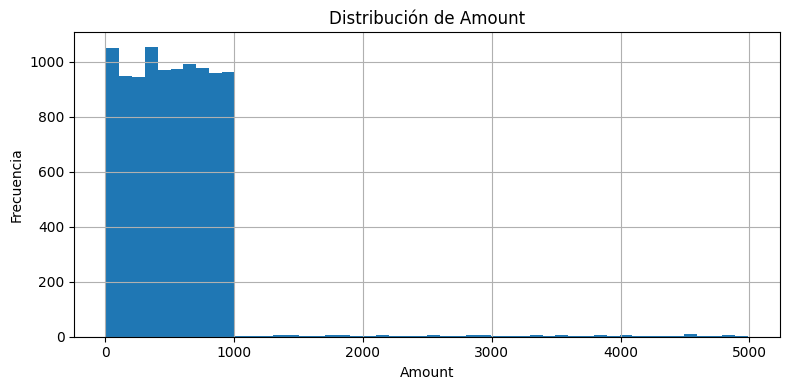

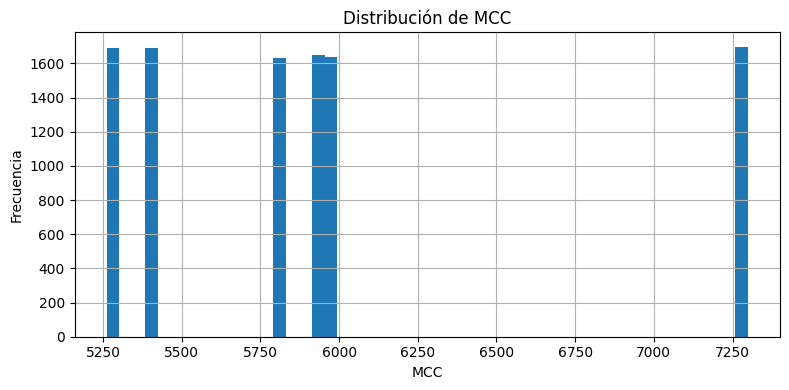

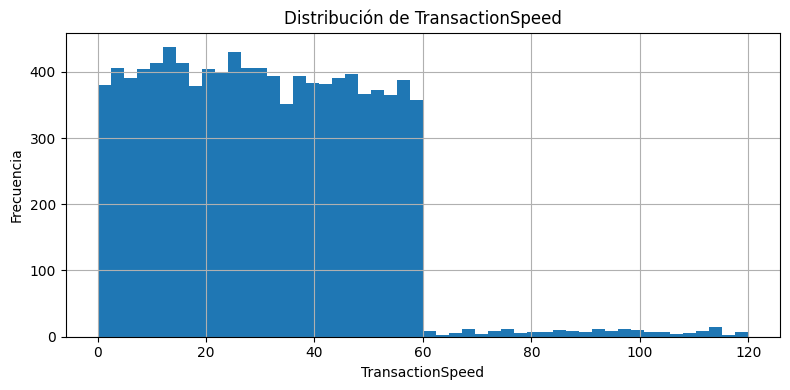

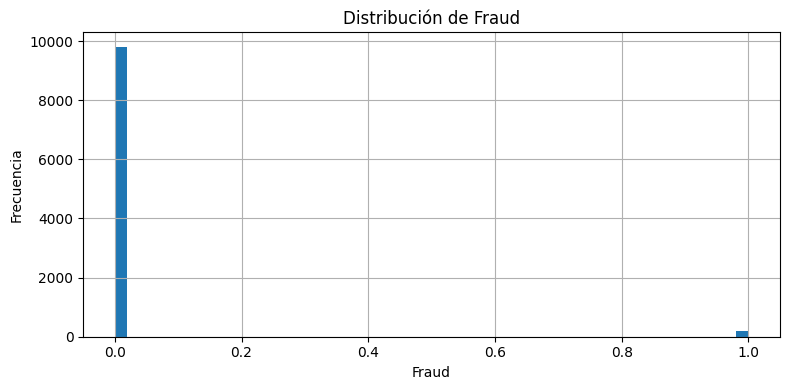

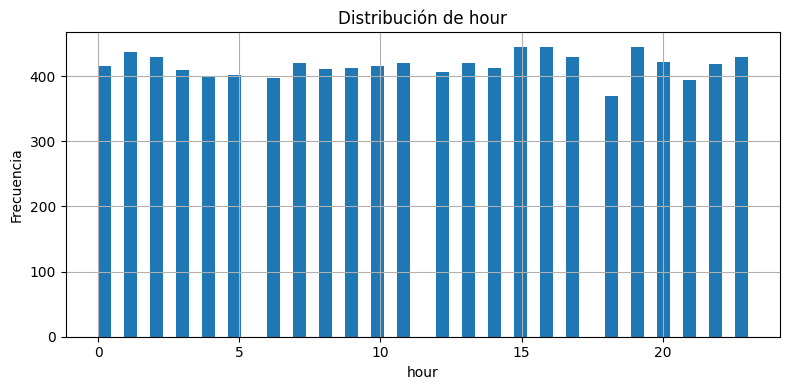

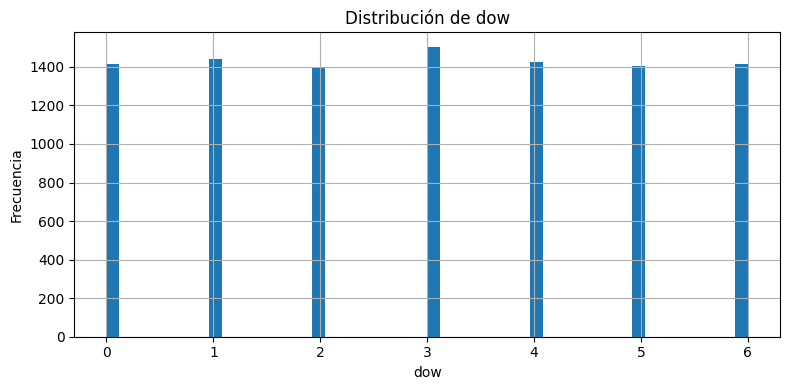

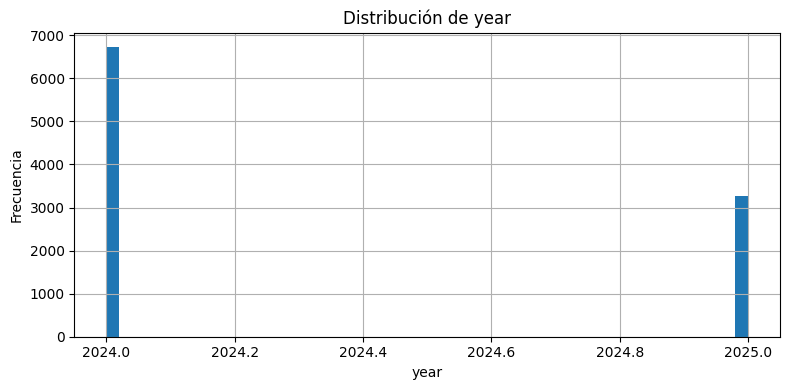

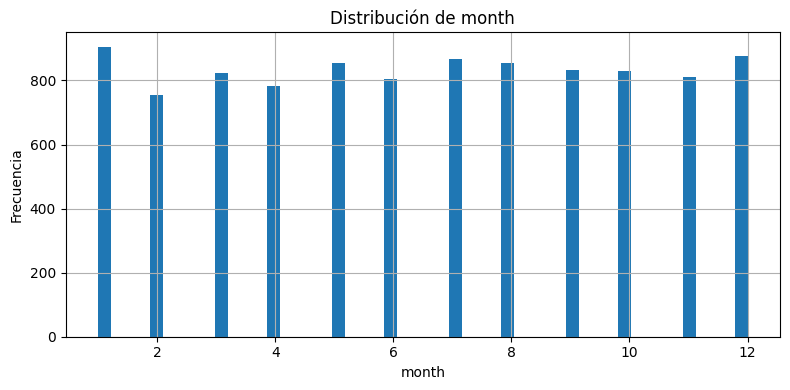

In [111]:
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=50)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

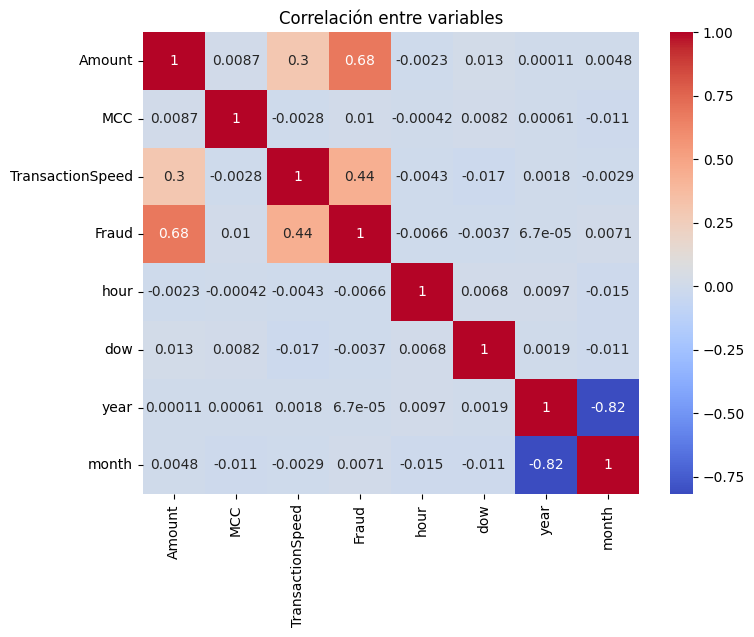

In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

## **MinMax Scaler**

In [113]:
columnas_MinMaxScaler = columnas_numericas.drop(["MCC"])
print(columnas_MinMaxScaler)

Index(['Amount', 'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year', 'month'], dtype='object')


In [114]:
scaler = MinMaxScaler()
df[columnas_MinMaxScaler] = scaler.fit_transform(df[columnas_MinMaxScaler])

## **One Hot Encoding**

In [115]:
columnas_one_hot_encoding = columnas_categoricas.append(pd.Index(['MCC']))
columnas_one_hot_encoding = columnas_categoricas.append(pd.Index(['IPClass']))
columnas_one_hot_encoding = columnas_one_hot_encoding.drop(["IPAddress"])
print(columnas_one_hot_encoding)

Index(['CardholderName', 'MerchantName', 'Location', 'Device', 'IPClass'], dtype='object')


In [116]:
ohe = OneHotEncoder(handle_unknown="ignore")
cols_ohe = ohe.fit_transform(df[columnas_one_hot_encoding])
ohe_cols_names = ohe.get_feature_names_out(columnas_one_hot_encoding)
df_ohe = pd.DataFrame(cols_ohe.toarray(), columns=ohe_cols_names, index=df.index)
df = pd.concat([df.drop(columns = columnas_one_hot_encoding), df_ohe], axis=1)

In [117]:
print(df.columns)

Index(['Amount', 'MCC', 'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year',
       'month', 'CardholderName_Aaron Alvarado', 'CardholderName_Aaron Austin',
       ...
       'Location_Zimmermanfurt', 'Location_Zimmermanmouth',
       'Location_Zimmermanview', 'Device_Android', 'Device_POS', 'Device_Web',
       'Device_iOS', 'IPClass_A', 'IPClass_B', 'IPClass_C'],
      dtype='object', length=25828)


In [118]:
# columnas_numericas = df.select_dtypes(include=[np.number]).columns
# columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns
# print(columnas_categoricas)
# print(columnas_numericas)

## **Entrenamiento**

In [119]:
y = df["Fraud"]
X = df.drop(columns=["Fraud"])

In [120]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [121]:
X_train, X_resto, y_train, y_resto = train_test_split(
    X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42
)

In [122]:
vs = VarianceThreshold(threshold=0.01)
X_train = vs.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns[vs.get_support()])

In [123]:
X_resto = vs.transform(X_resto)
X_resto = pd.DataFrame(X_resto, columns=X.columns[vs.get_support()]) 

In [124]:
# Método 1: ANOVA F-value (para características continuas)
selector_f = SelectKBest(f_classif, k=10)  # Seleccionar top 10 características
selector_f.fit(X_train, y_train)
scores_f = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)
print("Top 10 características según ANOVA F-test:")
print(scores_f.head(10))

X_train_selected_f = selector_f.transform(X_train)
X_resto_selected_f = selector_f.transform(X_resto)

Top 10 características según ANOVA F-test:
             Feature       F_Score       P_Value
2   TransactionSpeed  54347.199137  0.000000e+00
0             Amount  29313.696107  0.000000e+00
8         Device_POS    125.954022  4.212679e-29
13         IPClass_C     64.400183  1.097439e-15
7     Device_Android     62.694208  2.598686e-15
1                MCC     26.573706  2.571965e-07
12         IPClass_B     23.696209  1.140593e-06
3               hour     18.402339  1.800619e-05
6              month     18.161258  2.043200e-05
5               year      9.552013  2.001299e-03


In [127]:
# Método 2: Información mutua (relaciones no lineales)
selector_mi = SelectKBest(mutual_info_classif, k=10)
selector_mi.fit(X_train, y_train)
scores_mi = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual_Info_Score': selector_mi.scores_
}).sort_values('Mutual_Info_Score', ascending=False)
print("\nTop 10 características según Información Mutua:")
print(scores_mi.head(10))

X_train_selected_mi = selector_mi.transform(X_train)
X_resto_selected_mi = selector_mi.transform(X_resto)


Top 10 características según Información Mutua:
             Feature  Mutual_Info_Score
2   TransactionSpeed           0.693184
0             Amount           0.615083
3               hour           0.560977
6              month           0.482528
4                dow           0.454295
5               year           0.091007
11         IPClass_A           0.053833
8         Device_POS           0.050352
10        Device_iOS           0.046717
13         IPClass_C           0.045843


In [128]:
X_validacion, X_prueba, y_validacion, y_prueba = train_test_split(
    X_resto_selected_mi, y_resto, test_size=0.5, stratify=y_resto, random_state=42
)